In [14]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [15]:
sb.set()

In [16]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of 4-aminopyridine (Metabolite_id = 1175)

In [17]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select metabolite_id, 
                                        metab_name,
                                        provider_name, 
                                        date, 
                                        max(price_per_g) as maximo, 
                                        avg(price_per_g) as media, 
                                        min(price_per_g) as minimo, 
                                        count(price) as num_price
                                        from (
                                                select bioanalysis_metabolite_price.metabolite_id,
                                                       bioanalysis_metabolite.common_name                    as metab_name,
                                                       bioanalysis_metabolite_price.date, 
                                                       bioanalysis_metabolite_price.price                    as price, 
                                                       bioanalysis_metabolite_price.amount                   as amount, 
                                                       bioanalysis_metabolite_price.unity                    as unity, 
                                                       if(provider.name is null, "None", provider.name)      as provider_name, 
                                                       price/amount                                          as price_per_unity,
                                                       price/amount*convert_to_g(unity)                      as price_per_g,
                                                       price/amount*convert_to_l(unity)                      as price_per_l
                                                from bioanalysis_metabolite_price
                                                JOIN provider 
                                                    on provider.id = bioanalysis_metabolite_price.provider_id
                                                JOIN bioanalysis_metabolite
                                                    on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                                where (convert_to_g(unity) is not null 
                                                or convert_to_l(unity) is not null )       #da apenas os preços por grama, litro e derivados
                                        ) as metab_prices
                                        where metabolite_id= 1175
                                        group by metabolite_id, provider_name, date; ''', cnx, index_col = 'date', parse_dates=True) 


df = pd.DataFrame(sql_query, columns=['metabolite_id', 'metab_name', 'provider_name', 'maximo', 'media', 'minimo', 'num_price' ])



In [18]:
df

,metabolite_id,metab_name,provider_name,maximo,media,minimo,num_price
date,,,,,,,
2017-10-10 10:27:08,1175,4-aminopyridine,ENAMINE Ltd.,0.055000,0.009826,0.002350,14
2017-10-10 10:27:08,1175,4-aminopyridine,"Vitas-M Laboratory, Ltd.",0.038000,0.011451,0.002570,8
2017-10-10 10:27:08,1175,4-aminopyridine,"Maybridge, Ltd.",0.066880,0.014199,0.002414,14
2017-10-10 10:27:08,1175,4-aminopyridine,HTS Biochemie Innovationen,400.000000,40.007650,0.000560,10
2017-10-10 10:27:08,1175,4-aminopyridine,Tocris Bioscience,0.001000,0.001000,0.001000,1
2017-10-10 10:27:08,1175,4-aminopyridine,"Otava, Ltd.",0.024900,0.008923,0.002920,9
2017-10-10 10:27:08,1175,4-aminopyridine,BIONET/Key Organics Ltd.,0.038850,0.008941,0.000800,14
2017-10-10 10:27:08,1175,4-aminopyridine,"Alinda Chemical, Ltd.",0.015000,0.003689,0.001000,9
2017-10-10 10:27:08,1175,4-aminopyridine,TargetMol,0.002000,0.001753,0.001560,3


Text(0, 0.5, 'Price (USD)')

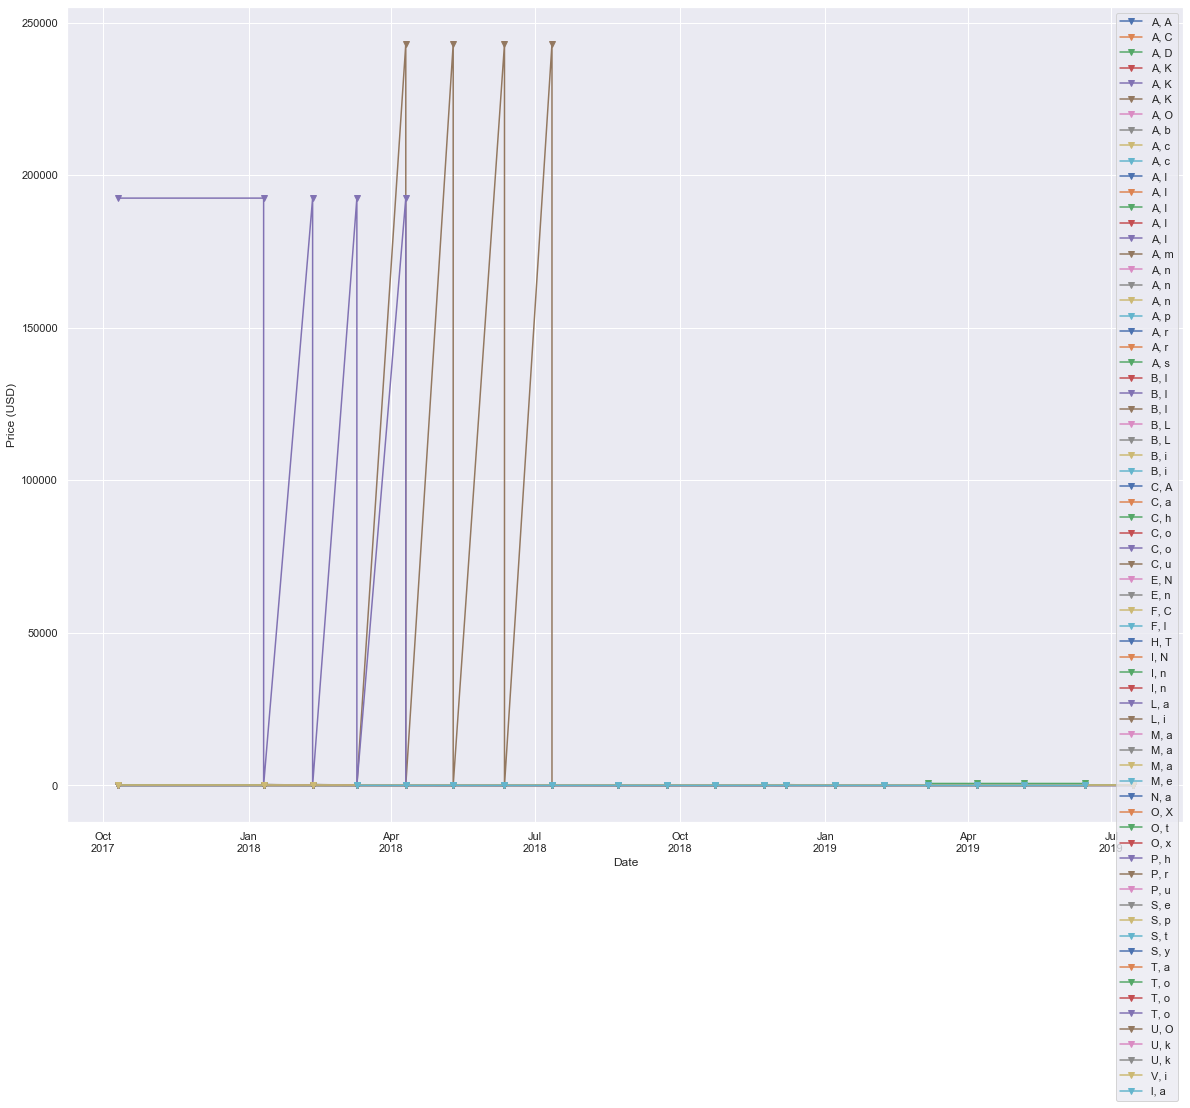

In [19]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['provider_name'])['media']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
#plt.show()

In [20]:
grouped_df = df.groupby('provider_name')

for key, item in grouped_df:
    print('key:', key)
    print(grouped_df.get_group(key), "\n\n")

key: AA BLOCKS
                     metabolite_id       metab_name provider_name  maximo  \
date                                                                        
2019-06-14 11:14:45           1175  4-aminopyridine     AA BLOCKS    17.0   
2019-07-14 11:30:51           1175  4-aminopyridine     AA BLOCKS    17.0   
2019-07-14 11:30:52           1175  4-aminopyridine     AA BLOCKS     6.6   

                         media  minimo  num_price  
date                                               
2019-06-14 11:14:45   8.893333    3.08          3  
2019-07-14 11:30:51  17.000000   17.00          1  
2019-07-14 11:30:52   4.840000    3.08          2   


key: ACC Corporation
                     metabolite_id       metab_name    provider_name  \
date                                                                   
2017-10-10 10:27:10           1175  4-aminopyridine  ACC Corporation   
2018-01-10 11:35:20           1175  4-aminopyridine  ACC Corporation   
2018-01-10 11:35:22        

2019-07-14 11:30:52      10.0       3.472000   0.900          5   


key: AOBChem USA
                     metabolite_id       metab_name provider_name  maximo  \
date                                                                        
2018-01-10 11:35:22           1175  4-aminopyridine   AOBChem USA     4.6   
2018-02-10 11:41:22           1175  4-aminopyridine   AOBChem USA     4.6   
2018-03-10 11:43:04           1175  4-aminopyridine   AOBChem USA     4.6   
2018-04-10 10:43:17           1175  4-aminopyridine   AOBChem USA     4.6   
2018-05-10 10:43:35           1175  4-aminopyridine   AOBChem USA     4.6   
2018-06-11 21:49:40           1175  4-aminopyridine   AOBChem USA     4.6   
2018-07-11 23:03:26           1175  4-aminopyridine   AOBChem USA     4.6   
2018-08-22 23:27:12           1175  4-aminopyridine   AOBChem USA     4.6   
2018-09-22 23:27:43           1175  4-aminopyridine   AOBChem USA     4.6   
2018-10-22 23:30:54           1175  4-aminopyridine   AOBChem USA  

                     metabolite_id       metab_name provider_name  maximo  \
date                                                                        
2019-03-06 18:36:21           1175  4-aminopyridine       Alichem  1835.9   
2019-04-06 17:37:29           1175  4-aminopyridine       Alichem  1835.9   
2019-05-06 17:38:41           1175  4-aminopyridine       Alichem  1835.9   
2019-06-14 11:14:47           1175  4-aminopyridine       Alichem  1835.0   

                          media    minimo  num_price  
date                                                  
2019-03-06 18:36:21  611.968503  0.002244          3  
2019-04-06 17:37:29  611.968503  0.002244          3  
2019-05-06 17:38:41  611.968503  0.002244          3  
2019-06-14 11:14:47  611.668501  0.002242          3   


key: Alinda Chemical Trading Company
                     metabolite_id       metab_name  \
date                                                  
2018-11-23 00:35:41           1175  4-aminopyridine   
20

                     metabolite_id       metab_name      provider_name  \
date                                                                     
2017-10-10 10:27:10           1175  4-aminopyridine  Apollo Scientific   
2018-01-10 11:35:20           1175  4-aminopyridine  Apollo Scientific   
2018-01-10 11:35:22           1175  4-aminopyridine  Apollo Scientific   
2018-02-10 11:41:22           1175  4-aminopyridine  Apollo Scientific   
2018-03-10 11:43:03           1175  4-aminopyridine  Apollo Scientific   
2018-03-10 11:43:04           1175  4-aminopyridine  Apollo Scientific   
2018-04-10 10:43:16           1175  4-aminopyridine  Apollo Scientific   
2018-04-10 10:43:17           1175  4-aminopyridine  Apollo Scientific   
2018-05-10 10:43:34           1175  4-aminopyridine  Apollo Scientific   
2018-05-10 10:43:35           1175  4-aminopyridine  Apollo Scientific   
2018-06-11 21:49:39           1175  4-aminopyridine  Apollo Scientific   
2018-06-11 21:49:40           1175  4-

2018-07-11 23:03:24     3.0   1.98     0.9          5   


key: Biocore Pharmtech Limited
                     metabolite_id       metab_name  \
date                                                  
2018-01-10 11:35:22           1175  4-aminopyridine   
2018-02-10 11:41:22           1175  4-aminopyridine   
2018-03-10 11:43:04           1175  4-aminopyridine   
2018-04-10 10:43:17           1175  4-aminopyridine   
2018-05-10 10:43:35           1175  4-aminopyridine   
2018-06-11 21:49:40           1175  4-aminopyridine   
2018-07-11 23:03:26           1175  4-aminopyridine   
2018-08-22 23:27:12           1175  4-aminopyridine   
2018-09-22 23:27:43           1175  4-aminopyridine   

                                 provider_name  maximo  media  minimo  \
date                                                                    
2018-01-10 11:35:22  Biocore Pharmtech Limited    62.0  28.48    5.84   
2018-02-10 11:41:22  Biocore Pharmtech Limited    62.0  28.48    5.84   
2018-03-10 1

                     metabolite_id       metab_name provider_name  maximo  \
date                                                                        
2017-10-10 10:27:10           1175  4-aminopyridine   ChemShuttle     1.6   
2018-01-10 11:35:20           1175  4-aminopyridine   ChemShuttle     1.6   
2018-01-10 11:35:22           1175  4-aminopyridine   ChemShuttle     9.0   
2018-02-10 11:41:22           1175  4-aminopyridine   ChemShuttle     9.0   
2018-03-10 11:43:03           1175  4-aminopyridine   ChemShuttle     1.6   
2018-03-10 11:43:04           1175  4-aminopyridine   ChemShuttle     9.0   
2018-04-10 10:43:16           1175  4-aminopyridine   ChemShuttle     1.6   
2018-04-10 10:43:17           1175  4-aminopyridine   ChemShuttle     9.0   
2018-05-10 10:43:34           1175  4-aminopyridine   ChemShuttle     1.6   
2018-05-10 10:43:35           1175  4-aminopyridine   ChemShuttle     9.0   
2018-06-11 21:49:39           1175  4-aminopyridine   ChemShuttle     1.6   

                     metabolite_id       metab_name     provider_name  maximo  \
date                                                                            
2017-10-10 10:27:08           1175  4-aminopyridine  Curpys Chemicals   280.0   
2018-01-10 11:35:15           1175  4-aminopyridine  Curpys Chemicals   280.0   
2018-01-10 11:35:17           1175  4-aminopyridine  Curpys Chemicals   268.0   
2018-02-10 11:41:18           1175  4-aminopyridine  Curpys Chemicals   280.0   
2018-02-10 11:41:20           1175  4-aminopyridine  Curpys Chemicals   268.0   
2018-03-10 11:42:58           1175  4-aminopyridine  Curpys Chemicals   280.0   
2018-03-10 11:43:02           1175  4-aminopyridine  Curpys Chemicals   268.0   
2018-03-10 11:43:03           1175  4-aminopyridine  Curpys Chemicals    20.0   
2018-03-10 11:43:04           1175  4-aminopyridine  Curpys Chemicals    20.0   
2018-04-10 10:43:13           1175  4-aminopyridine  Curpys Chemicals   280.0   
2018-04-10 10:43:15         

                     metabolite_id       metab_name        provider_name  \
date                                                                       
2017-10-10 10:27:08           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-01-10 11:35:15           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-02-10 11:41:18           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-03-10 11:42:58           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-04-10 10:43:13           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-05-10 10:43:31           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-06-11 21:49:36           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-07-11 23:03:21           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-08-22 23:27:08           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-09-22 23:27:39           1175  4-aminopyridine  InterBioScreen Ltd.   
2018-10-22 23:30:51           1175  4-aminopyridine  InterBioScreen Ltd.   

           

                     metabolite_id       metab_name  \
date                                                  
2017-10-10 10:27:10           1175  4-aminopyridine   
2018-01-10 11:35:20           1175  4-aminopyridine   
2018-02-10 11:41:22           1175  4-aminopyridine   
2018-03-10 11:43:03           1175  4-aminopyridine   
2018-04-10 10:43:16           1175  4-aminopyridine   
2018-05-10 10:43:34           1175  4-aminopyridine   
2018-06-11 21:49:39           1175  4-aminopyridine   
2018-07-11 23:03:25           1175  4-aminopyridine   
2018-08-22 23:27:11           1175  4-aminopyridine   
2018-09-22 23:27:42           1175  4-aminopyridine   
2018-10-22 23:30:53           1175  4-aminopyridine   
2018-11-23 00:35:43           1175  4-aminopyridine   
2018-12-06 18:35:40           1175  4-aminopyridine   

                                      provider_name  maximo  media  minimo  \
date                                                                         
2017-10-10 10:27:1

                     metabolite_id       metab_name  \
date                                                  
2017-10-10 10:27:08           1175  4-aminopyridine   
2018-01-10 11:35:15           1175  4-aminopyridine   
2018-01-10 11:35:17           1175  4-aminopyridine   
2018-02-10 11:41:18           1175  4-aminopyridine   
2018-02-10 11:41:20           1175  4-aminopyridine   
2018-03-10 11:42:58           1175  4-aminopyridine   
2018-03-10 11:43:02           1175  4-aminopyridine   
2018-04-10 10:43:13           1175  4-aminopyridine   
2018-04-10 10:43:15           1175  4-aminopyridine   
2018-05-10 10:43:31           1175  4-aminopyridine   
2018-05-10 10:43:33           1175  4-aminopyridine   
2018-06-11 21:49:36           1175  4-aminopyridine   
2018-06-11 21:49:37           1175  4-aminopyridine   
2018-07-11 23:03:21           1175  4-aminopyridine   
2018-07-11 23:03:24           1175  4-aminopyridine   
2018-08-22 23:27:08           1175  4-aminopyridine   
2018-08-22

In [21]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (Price/g)',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)

prov_list = []
for key, item in grouped_df:
    prov_list.append(key)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['provider_name'])['media']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines+markers',
           name = 'provider {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AA BLOCKS', 'ACC Corporation', 'AD Chem…

#### PROBLEMA: Providers com nomes parecidos

Providers que se sobrepõem:  
- AK Scientific, Inc. **VS** AK Scientific e AK Scientific Inc.
- Angene **VS** Angene (China) **VS** Angene International Limited
- BLD Pharmatech Ltd. **VS** BLD PHARMATECH LTD
- ENAMINE Ltd. **VS** Enamine Ltd Chemspace partner
- Manchester Organics **VS** Manchester Organics Limited
- Toronto Research Chemicals **VS** Toronto Research Chemicals, Inc.
- INTERBIOSCREEN Limited **VS** InterBioScreen Doo. e InterBioScreen Ltd.
- UkrOrgSyntez Ltd Chemspace partner **VS** UkrOrgSynthesis
- Labseeker **VS** labseeker Inc.
- Aldlab (este é melhor que o outro) **VS** Aldlab Chemicals LLC

Logo, não se pode tratar destes providers como se fossem mudanças de nome consoante o decorrer do tempo.

*NO ENTANTO*

Providers que **não** se sobrepõem:
- Alinda Chemical, Ltd.  **->**  Alinda Chemical Trading Company
- BIONET/Key Organics Ltd. **->** BIONET - Key Organics Ltd.

Aqui já podem ter sido uma mudança de nome (acho que pode ser corrigido).


#### PROBLEMA: Possíveis outliers

Providers com preços muito elevados em comparação ao resto:
- AK Scientific, Inc. 
- Labseeker
- Alichem (não está tão elevado como os dois acima)

Talvez sejam outliers??

#### PROBLEMA: Apenas 1 preços

Providers com apenas 1 preço na time series inteira:
- Combi-Blocks, Inc.
- UkrOrgSyntez Ltd Chemspace partner

Podem ser providers que possam ser apagados se não tiverem muitos preços.

#### PROBLEMA: Oscilações na linha

Providers com oscilações acentuadas na time series:
- ACC Corporation
- AK Scientific Inc.
- AK Scientific, Inc. (apenas num determinado período de tempo - 10/03/18 a 11/07/18)
- Acadechem Co., Ltd
- Angene
- Angene (China)
- Angene International Limited
- Apollo Scientific
- Ark Pharm, Inc.
- CARBONE SCIENTIFIC CO., LTD
- Chem Shuttle
- Cohnchem Scientific Co., Ltd
- Curpys Chemicals **(este é um caso grave)**
- ENAMINE Ltd.
- Enamine Ltd Chemspace partner
- FCH Group Chemspace partner
- Fluorochem Limited **grave**
- Labseeker
- Manchester Organics **grave**
- Manchester Organics Limited 
- Specs
- StruChem CO., LTD
- SynQuest Laboratories, Inc.
- UORSY Chemspace partner
- UkrOrgSynthesis 
- labseeker Inc

As oscilações ainda vistas neste gráfico devem-se a significativas diferenças nas médias com apenas diferença de 2 segundos. No ACC Corporation o que se vê por exemplo é que a primeira vez que retira preços só guarda 1 e passado 2 segundos já guarda 3 preços o que aumenta a média significativamente.

    **Deve melhorar se fizer a análise mensal.

In [22]:
cnx.close()

-------------------

### Time Series Plot of 4-aminopyridine (Metabolite_id = 1175) ---- MENSAL

In [24]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select metabolite_id, 
                                        metab_name,
                                        provider_name, 
                                        date, 
                                        max(price_per_g) as maximo, 
                                        avg(price_per_g) as media, 
                                        min(price_per_g) as minimo, 
                                        count(price) as num_price
                                        from (
                                                select bioanalysis_metabolite_price.metabolite_id,
                                                       bioanalysis_metabolite.common_name                    as metab_name,
                                                       bioanalysis_metabolite_price.date, 
                                                       bioanalysis_metabolite_price.price                    as price, 
                                                       bioanalysis_metabolite_price.amount                   as amount, 
                                                       bioanalysis_metabolite_price.unity                    as unity, 
                                                       if(provider.name is null, "None", provider.name)      as provider_name, 
                                                       price/amount                                          as price_per_unity,
                                                       price/amount*convert_to_g(unity)                      as price_per_g,
                                                       price/amount*convert_to_l(unity)                      as price_per_l
                                                from bioanalysis_metabolite_price
                                                JOIN provider 
                                                    on provider.id = bioanalysis_metabolite_price.provider_id
                                                JOIN bioanalysis_metabolite
                                                    on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                                where (convert_to_g(unity) is not null 
                                                or convert_to_l(unity) is not null )       #da apenas os preços por grama, litro e derivados
                                        ) as metab_prices
                                        where metabolite_id= 1175
                                        group by metabolite_id, provider_name,  year(date), month(date); ''', cnx, index_col = 'date', parse_dates=True) 


df_month = pd.DataFrame(sql_query, columns=['metabolite_id', 'metab_name', 'provider_name', 'maximo', 'media', 'minimo', 'num_price' ])



In [25]:
df_month

,metabolite_id,metab_name,provider_name,maximo,media,minimo,num_price
date,,,,,,,
2017-10-10 10:27:08,1175,4-aminopyridine,ENAMINE Ltd.,0.055000,0.009826,0.002350,14
2017-10-10 10:27:08,1175,4-aminopyridine,"Vitas-M Laboratory, Ltd.",0.038000,0.011451,0.002570,8
2017-10-10 10:27:08,1175,4-aminopyridine,"Maybridge, Ltd.",0.066880,0.014199,0.002414,14
2017-10-10 10:27:08,1175,4-aminopyridine,HTS Biochemie Innovationen,400.000000,40.007650,0.000560,10
2017-10-10 10:27:08,1175,4-aminopyridine,Tocris Bioscience,0.001000,0.001000,0.001000,1
2017-10-10 10:27:08,1175,4-aminopyridine,"Otava, Ltd.",0.024900,0.008923,0.002920,9
2017-10-10 10:27:08,1175,4-aminopyridine,BIONET/Key Organics Ltd.,0.038850,0.008941,0.000800,14
2017-10-10 10:27:08,1175,4-aminopyridine,"Alinda Chemical, Ltd.",0.015000,0.003689,0.001000,9
2017-10-10 10:27:08,1175,4-aminopyridine,TargetMol,0.002000,0.001753,0.001560,3


In [26]:
grouped_dfM = df_month.groupby('provider_name')

for key, item in grouped_dfM:
    print('key:', key)
    print(grouped_dfM.get_group(key), "\n\n")

key: AA BLOCKS
                     metabolite_id       metab_name provider_name  maximo  \
date                                                                        
2019-06-14 11:14:45           1175  4-aminopyridine     AA BLOCKS    17.0   
2019-07-14 11:30:51           1175  4-aminopyridine     AA BLOCKS    17.0   

                        media  minimo  num_price  
date                                              
2019-06-14 11:14:45  8.893333    3.08          3  
2019-07-14 11:30:51  8.893333    3.08          3   


key: ACC Corporation
                     metabolite_id       metab_name    provider_name  \
date                                                                   
2017-10-10 10:27:10           1175  4-aminopyridine  ACC Corporation   
2018-01-10 11:35:20           1175  4-aminopyridine  ACC Corporation   
2018-02-10 11:41:22           1175  4-aminopyridine  ACC Corporation   
2018-03-10 11:43:03           1175  4-aminopyridine  ACC Corporation   
2018-04-10 10:43

                     metabolite_id       metab_name             provider_name  \
date                                                                            
2017-10-10 10:27:08           1175  4-aminopyridine  BIONET/Key Organics Ltd.   
2018-01-10 11:35:15           1175  4-aminopyridine  BIONET/Key Organics Ltd.   
2018-02-10 11:41:18           1175  4-aminopyridine  BIONET/Key Organics Ltd.   
2018-03-10 11:42:58           1175  4-aminopyridine  BIONET/Key Organics Ltd.   
2018-04-10 10:43:13           1175  4-aminopyridine  BIONET/Key Organics Ltd.   
2018-05-10 10:43:31           1175  4-aminopyridine  BIONET/Key Organics Ltd.   
2018-06-11 21:49:36           1175  4-aminopyridine  BIONET/Key Organics Ltd.   
2018-07-11 23:03:21           1175  4-aminopyridine  BIONET/Key Organics Ltd.   

                      maximo     media    minimo  num_price  
date                                                         
2017-10-10 10:27:08  0.03885  0.008941  0.000800         14  
201

2019-06-14 11:14:46          4   


key: Maybridge, Ltd.
                     metabolite_id       metab_name    provider_name   maximo  \
date                                                                            
2017-10-10 10:27:08           1175  4-aminopyridine  Maybridge, Ltd.  0.06688   
2018-01-10 11:35:15           1175  4-aminopyridine  Maybridge, Ltd.  0.06688   
2018-02-10 11:41:18           1175  4-aminopyridine  Maybridge, Ltd.  0.06688   
2018-03-10 11:42:58           1175  4-aminopyridine  Maybridge, Ltd.  0.06688   
2018-04-10 10:43:13           1175  4-aminopyridine  Maybridge, Ltd.  0.06688   
2018-05-10 10:43:31           1175  4-aminopyridine  Maybridge, Ltd.  0.06688   
2018-06-11 21:49:36           1175  4-aminopyridine  Maybridge, Ltd.  0.06688   
2018-07-11 23:03:21           1175  4-aminopyridine  Maybridge, Ltd.  0.06688   
2018-08-22 23:27:08           1175  4-aminopyridine  Maybridge, Ltd.  0.06688   
2018-09-22 23:27:39           1175  4-aminopyridine 

2019-06-14 11:14:46  1.6925   0.385          2   




In [27]:
#Create plot with plotly

df_month = df_month.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (Price/g)',
    yaxis = dict(
        title = 'price (USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)

prov_list = []
for key, item in grouped_dfM:
    prov_list.append(key)
    

d_x = {}
d_y = {}
for k,g in df_month.groupby(['provider_name'])['media']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines+markers',
           name = 'provider {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AA BLOCKS', 'ACC Corporation', 'AD Chem…

Em relação aos providers Aldlab e Aldlab Chemicals LLC, embora se sobreponham, o último tem dados para todos os meses sendo muito mais importante que o primeiro.

Comprovado pelo gráfico:
- Alinda Chemical, Ltd. -> Alinda Chemical Trading Company (continua na mesma reta e o mês seguinte)
- BIONET/Key Organics Ltd. -> BIONET - Key Organics Ltd. (não falta nenhum mês e continua o mesmo valor)
- InterBioScreen Ltd. -> InterBioScreen Doo.

BIOTREND Chemicals, AG tem o preço mais baixo da time series, neste metabolito!